In [ ]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv("../data/data.csv")

# Drop unnecessary columns
df = df.drop(columns=['StudentID'])

# Define features (X) and target (y)
X = df.drop(columns=['GPA'])
y = df['GPA']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

# Save the model and scaler
joblib.dump(model, "../API/model.pkl")
joblib.dump(scaler, "../API/scaler.pkl")

Mean Squared Error: 0.04
R-squared Score: 0.96


['../API/scaler.pkl']

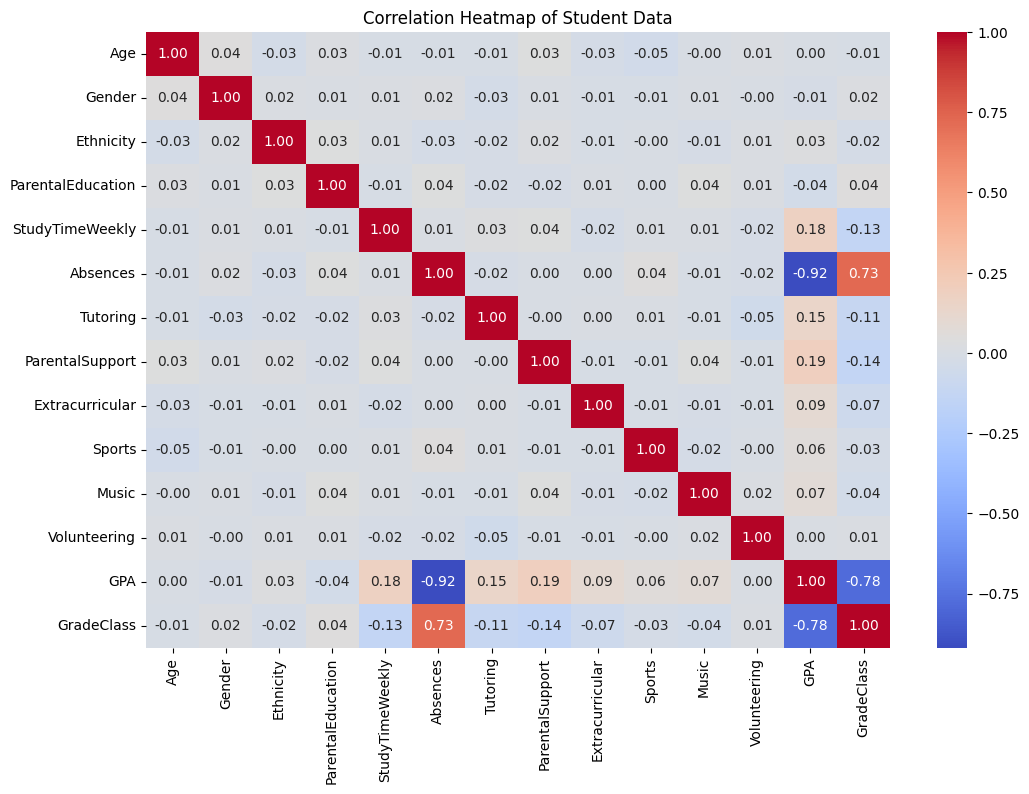

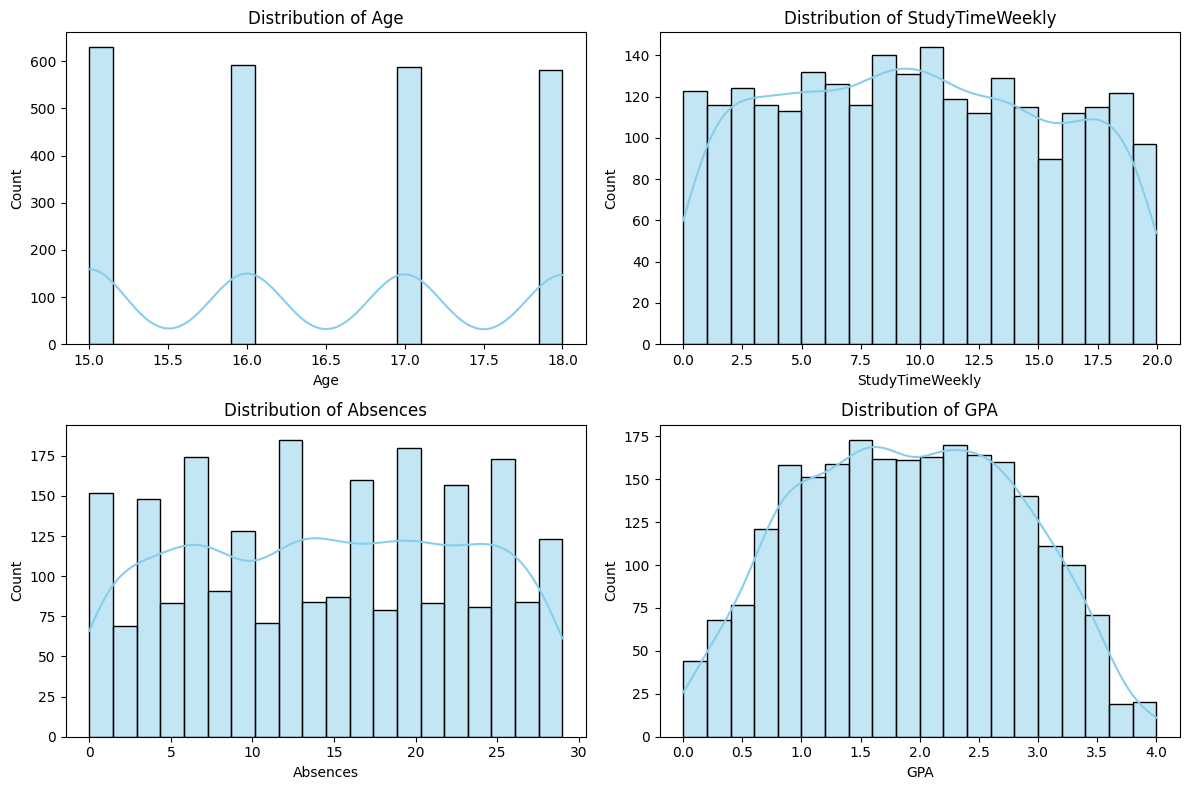

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Student Data")
plt.show()

# Histograms for Key Variables
features_to_plot = ['Age', 'StudyTimeWeekly', 'Absences', 'GPA']

plt.figure(figsize=(12, 8))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[feature], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

In [27]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate Random Forest Model
rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
print(f"Random Forest Mean Squared Error: {rf_mse}")

Random Forest Mean Squared Error: 0.05344036579394423


In [28]:
from sklearn.tree import DecisionTreeRegressor

# Train Decision Tree Model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Evaluate Decision Tree Model
dt_predictions = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_predictions)
print(f"Decision Tree Mean Squared Error: {dt_mse}")

Decision Tree Mean Squared Error: 0.09990544334320242


In [29]:
import joblib

# Compare MSE and Save the Best Model
models = {'linear_regression': (model, mse), 
          'random_forest': (rf_model, rf_mse), 
          'decision_tree': (dt_model, dt_mse)}

best_model_name, (best_model, best_mse) = min(models.items(), key=lambda x: x[1][1])

print(f"Best Model: {best_model_name} with MSE: {best_mse}")

# Save the best model
joblib.dump(best_model, 'best_student_model.pkl')
print(f"Saved {best_model_name} as best_student_model.pkl")

Best Model: linear_regression with MSE: 0.03569628066412172
Saved linear_regression as best_student_model.pkl


In [30]:
# Make Prediction on One Data Point
sample_input = X_test.iloc[0].values.reshape(1, -1)
single_prediction = best_model.predict(sample_input)

print(f"Prediction for One Student: {single_prediction[0]}")

Prediction for One Student: -11.423993595233616


/Users/yvanshema/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


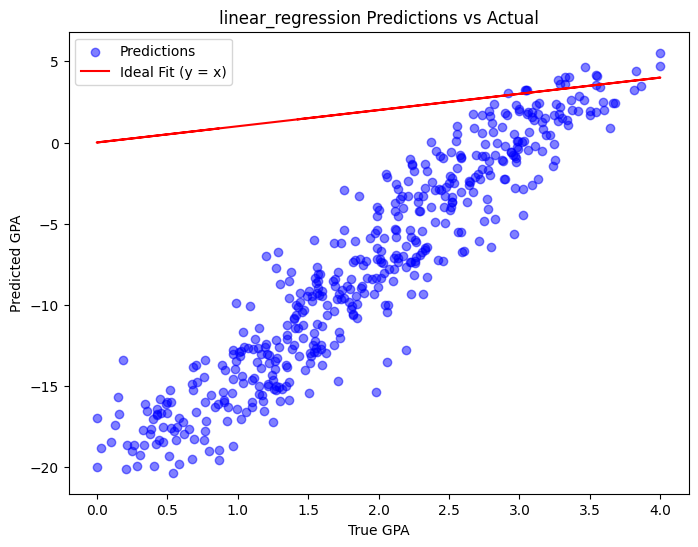

In [31]:
import matplotlib.pyplot as plt

# Make predictions using the best model
best_model_predictions = best_model.predict(X_test)

# Scatter Plot with Linear Fit
plt.figure(figsize=(8, 6))
plt.scatter(y_test, best_model_predictions, color='blue', alpha=0.5, label='Predictions')
plt.plot(y_test, y_test, color='red', label='Ideal Fit (y = x)')
plt.xlabel('True GPA')
plt.ylabel('Predicted GPA')
plt.title(f'{best_model_name} Predictions vs Actual')
plt.legend()
plt.show()